In [69]:
import os

from konlpy.tag import Okt
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import json
from wordcloud import WordCloud
from random import sample, seed
from transformers import BertTokenizer
from tokenizers import BertWordPieceTokenizer

seed(1234)
phoneme_tokenizer = Okt()

bert_tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-uncased", lowercase=True)
save_path = "bert_ckpt/"
if not os.path.exists(save_path):
    os.makedirs(save_path)
bert_tokenizer.save_pretrained(save_path)
tokenizer = BertWordPieceTokenizer("bert_ckpt/vocab.txt", lowercase=True)

## 데이터 수집

In [2]:
train_data_url = "https://korquad.github.io/dataset/KorQuAD_v1.0_train.json"
train_path = keras.utils.get_file("train.json", train_data_url)
eval_data_url = "https://korquad.github.io/dataset/KorQuAD_v1.0_dev.json"
eval_path = keras.utils.get_file("eval.json", eval_data_url)

In [3]:
train_data = json.load(open(train_path))
dev_data = json.load(open(eval_path))

## 지문 텍스트 분석

In [4]:
documents = []
for d in train_data['data']:
    documents += [p['context'] for p in d['paragraphs']]
print('전체 텍스트 수: {}'.format(len(documents)))

전체 텍스트 수: 9681


### 어절단위 길이 분석

In [5]:
len_docs = []
for d in documents:
    len_docs.append(len(d.split()))
    
print('텍스트 최대 길이: {}'.format(np.max(len_docs)))
print('텍스트 최소 길이: {}'.format(np.min(len_docs)))
print('텍스트 평균 길이: {:.2f}'.format(np.mean(len_docs)))
print('텍스트 길이 표준편차: {:.2f}'.format(np.std(len_docs)))
print('텍스트 중간 길이: {}'.format(np.median(len_docs)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 텍스트 길이: {}'.format(np.percentile(len_docs, 25)))
print('제 3 사분위 텍스트 길이: {}'.format(np.percentile(len_docs, 75)))

텍스트 최대 길이: 2244
텍스트 최소 길이: 7
텍스트 평균 길이: 114.87
텍스트 길이 표준편차: 47.57
텍스트 중간 길이: 102.0
제 1 사분위 텍스트 길이: 88.0
제 3 사분위 텍스트 길이: 127.0


{'whiskers': [<matplotlib.lines.Line2D at 0x16518ad90>,
 'caps': [<matplotlib.lines.Line2D at 0x1429bd9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16518ad50>],
 'medians': [<matplotlib.lines.Line2D at 0x1651ac950>],
 'fliers': [<matplotlib.lines.Line2D at 0x1651b43d0>],
 'means': [<matplotlib.lines.Line2D at 0x1651ace50>]}

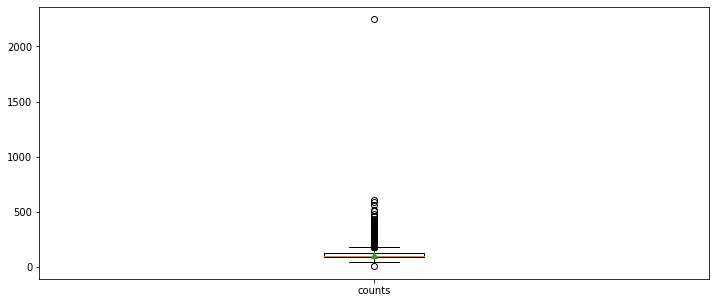

In [6]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([len_docs],
             labels=['counts'],
             showmeans=True)

Text(0, 0.5, 'Probability')

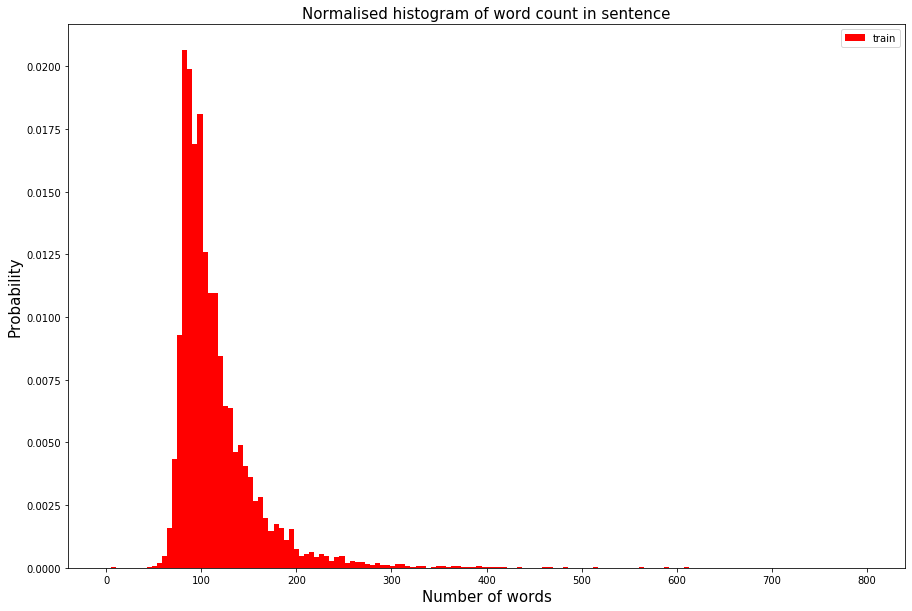

In [7]:
plt.figure(figsize=(15, 10))
plt.hist(len_docs, bins=150, range=[0,800], facecolor='r', density=True, label='train')
plt.title("Normalised histogram of word count in sentence", fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

### 버트 토크나이저 길이 분석

In [71]:
len_bert_tokenized_docs = []
for d in documents:
    len_bert_tokenized_docs.append(len(tokenizer.encode(d, add_special_tokens=False).tokens))
    
print('텍스트 최대 길이: {}'.format(np.max(len_bert_tokenized_docs)))
print('텍스트 최소 길이: {}'.format(np.min(len_bert_tokenized_docs)))
print('텍스트 평균 길이: {:.2f}'.format(np.mean(len_bert_tokenized_docs)))
print('텍스트 길이 표준편차: {:.2f}'.format(np.std(len_bert_tokenized_docs)))
print('텍스트 중간 길이: {}'.format(np.median(len_bert_tokenized_docs)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 텍스트 길이: {}'.format(np.percentile(len_bert_tokenized_docs, 25)))
print('제 3 사분위 텍스트 길이: {}'.format(np.percentile(len_bert_tokenized_docs, 75)))

텍스트 최대 길이: 8158
텍스트 최소 길이: 115
텍스트 평균 길이: 389.02
텍스트 길이 표준편차: 162.90
텍스트 중간 길이: 348.0
제 1 사분위 텍스트 길이: 298.0
제 3 사분위 텍스트 길이: 431.0


{'whiskers': [<matplotlib.lines.Line2D at 0x15f75e5d0>,
 'caps': [<matplotlib.lines.Line2D at 0x15f75e510>,
 'boxes': [<matplotlib.lines.Line2D at 0x16cd9a8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x15f770a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x15fbcf4d0>],
 'means': [<matplotlib.lines.Line2D at 0x15f770f90>]}

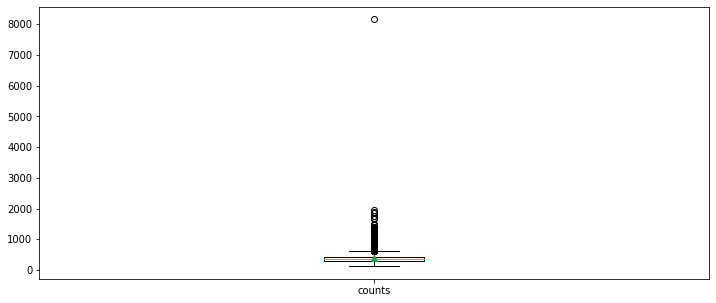

In [72]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([len_bert_tokenized_docs],
             labels=['counts'],
             showmeans=True)

Text(0, 0.5, 'Probability')

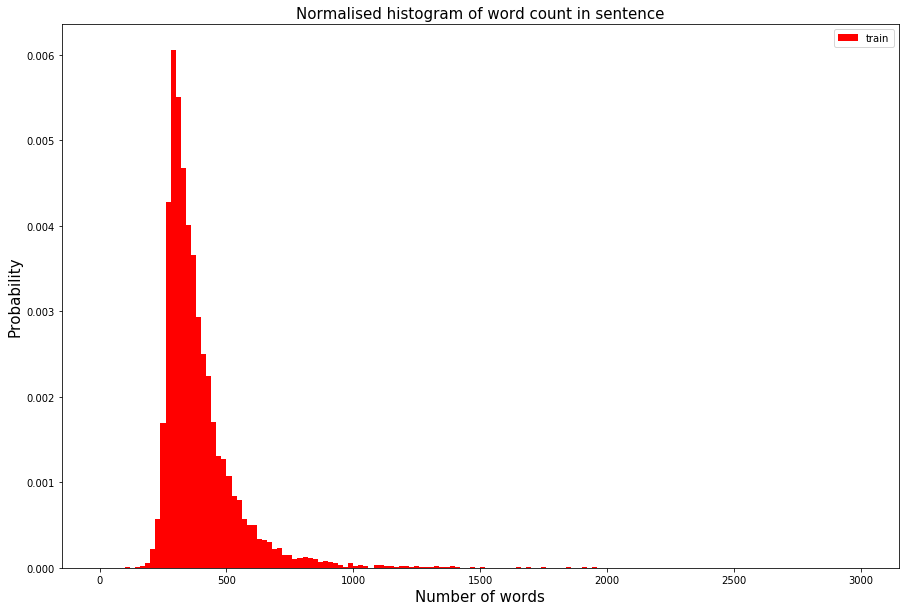

In [74]:
plt.figure(figsize=(15, 10))
plt.hist(len_bert_tokenized_docs, bins=150, range=[0,3000], facecolor='r', density=True, label='train')
plt.title("Normalised histogram of word count in sentence", fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

## 어휘 빈도

### 어절 토큰 기준

In [23]:
doc_sample_words = sample(' '.join(documents).split(), 3000)

(-0.5, 799.5, 599.5, -0.5)

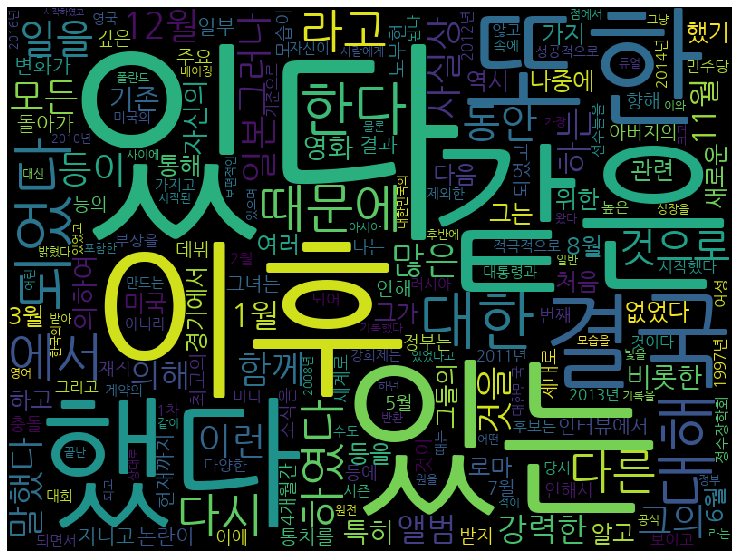

In [26]:
cloud = WordCloud(font_path = 'NanumGothic.ttf', width=800, height=600).generate(' '.join(doc_sample_words))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

### 명사 토큰 기준

(-0.5, 799.5, 599.5, -0.5)

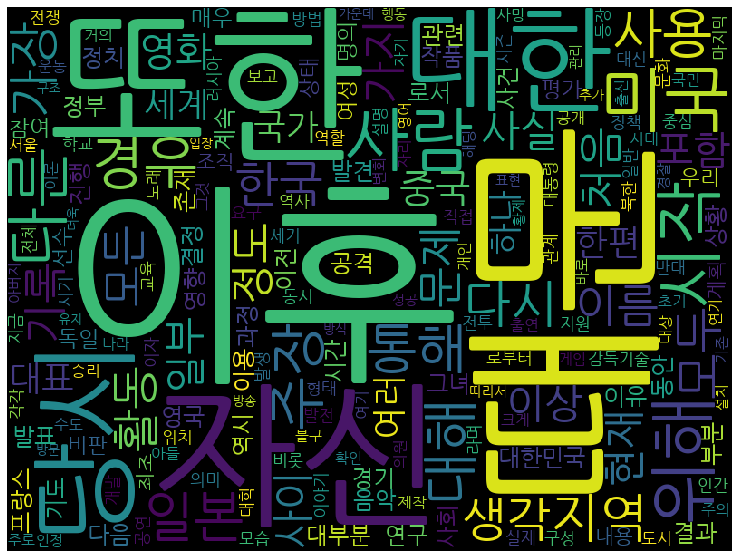

In [9]:
cloud = WordCloud(font_path = 'NanumGothic.ttf', width=800, height=600).generate(' '.join(phoneme_tokenizer.nouns(doc_sample_words)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

## 질문 데이터 분석

In [10]:
questions = []
for d in train_data['data']:
    qas = [p['qas'] for p in d['paragraphs']]
    for c in qas:
        questions += [q['question'] for q in c]
    
print('전체 질문 수: {}'.format(len(questions)))

전체 질문 수: 60407


### 어절단위 길이

In [11]:
len_qs = []
for q in questions:
    len_qs.append(len(q.split()))
    
print('텍스트 최대 길이: {}'.format(np.max(len_qs)))
print('텍스트 최소 길이: {}'.format(np.min(len_qs)))
print('텍스트 평균 길이: {:.2f}'.format(np.mean(len_qs)))
print('텍스트 길이 표준편차: {:.2f}'.format(np.std(len_qs)))
print('텍스트 중간 길이: {}'.format(np.median(len_qs)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 텍스트 길이: {}'.format(np.percentile(len_qs, 25)))
print('제 3 사분위 텍스트 길이: {}'.format(np.percentile(len_qs, 75)))

텍스트 최대 길이: 35
텍스트 최소 길이: 1
텍스트 평균 길이: 7.85
텍스트 길이 표준편차: 3.09
텍스트 중간 길이: 7.0
제 1 사분위 텍스트 길이: 6.0
제 3 사분위 텍스트 길이: 10.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1660df1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1660f2b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1660e93d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1660ff5d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1660fffd0>],
 'means': [<matplotlib.lines.Line2D at 0x1660ffad0>]}

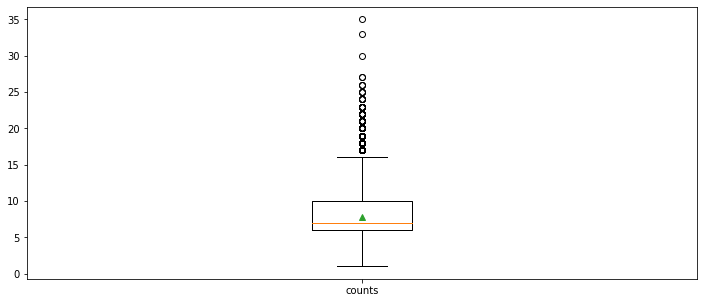

In [12]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([len_qs],
             labels=['counts'],
             showmeans=True)

Text(0, 0.5, 'Probability')

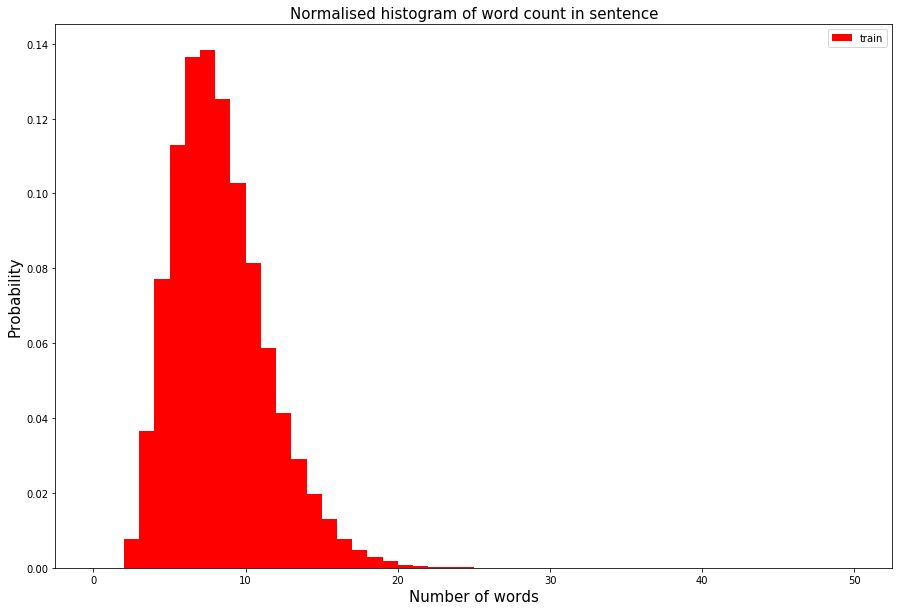

In [13]:
plt.figure(figsize=(15, 10))
plt.hist(len_qs, bins=50, range=[0,50], facecolor='r', density=True, label='train')
plt.title("Normalised histogram of word count in sentence", fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [76]:
len_bert_tokenized_q = []
for q in questions:
    len_bert_tokenized_q.append(len(tokenizer.encode(q, add_special_tokens=False).tokens))
    
print('텍스트 최대 길이: {}'.format(np.max(len_bert_tokenized_q)))
print('텍스트 최소 길이: {}'.format(np.min(len_bert_tokenized_q)))
print('텍스트 평균 길이: {:.2f}'.format(np.mean(len_bert_tokenized_q)))
print('텍스트 길이 표준편차: {:.2f}'.format(np.std(len_bert_tokenized_q)))
print('텍스트 중간 길이: {}'.format(np.median(len_bert_tokenized_q)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 텍스트 길이: {}'.format(np.percentile(len_bert_tokenized_q, 25)))
print('제 3 사분위 텍스트 길이: {}'.format(np.percentile(len_bert_tokenized_q, 75)))

텍스트 최대 길이: 108
텍스트 최소 길이: 4
텍스트 평균 길이: 27.48
텍스트 길이 표준편차: 10.23
텍스트 중간 길이: 26.0
제 1 사분위 텍스트 길이: 20.0
제 3 사분위 텍스트 길이: 33.0


{'whiskers': [<matplotlib.lines.Line2D at 0x167097650>,
 'caps': [<matplotlib.lines.Line2D at 0x16708f9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16708f990>],
 'medians': [<matplotlib.lines.Line2D at 0x167099b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1670a05d0>],
 'means': [<matplotlib.lines.Line2D at 0x167097b50>]}

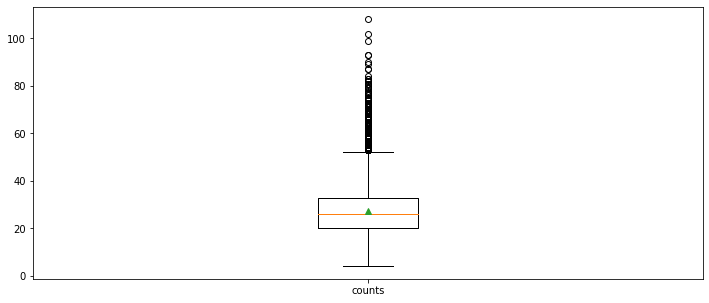

In [77]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([len_bert_tokenized_q],
             labels=['counts'],
             showmeans=True)

Text(0, 0.5, 'Probability')

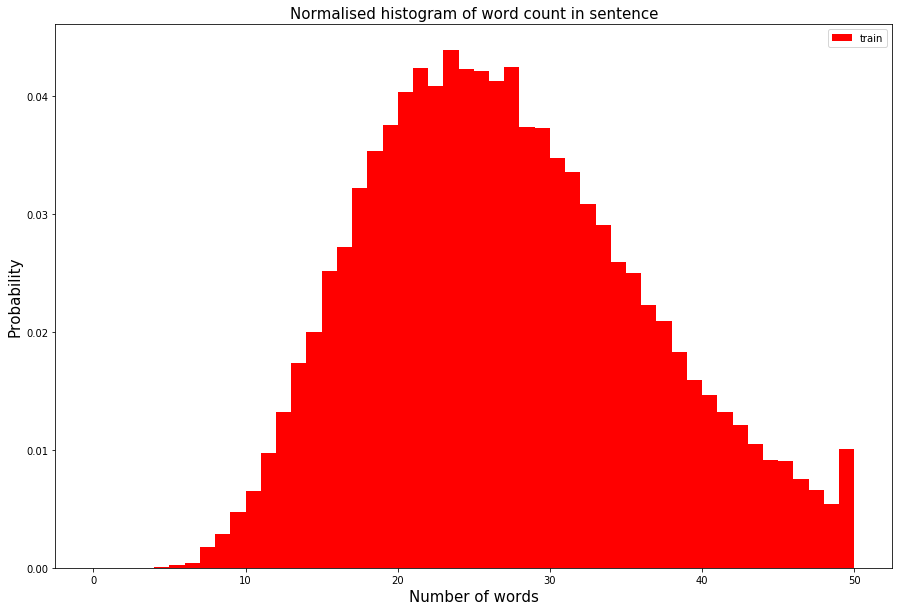

In [78]:
plt.figure(figsize=(15, 10))
plt.hist(len_bert_tokenized_q, bins=50, range=[0,50], facecolor='r', density=True, label='train')
plt.title("Normalised histogram of word count in sentence", fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

## 어휘 빈도

### 어절 토큰 기준

In [27]:
q_sample_words = sample(' '.join(questions).split(), 3000)

(-0.5, 799.5, 599.5, -0.5)

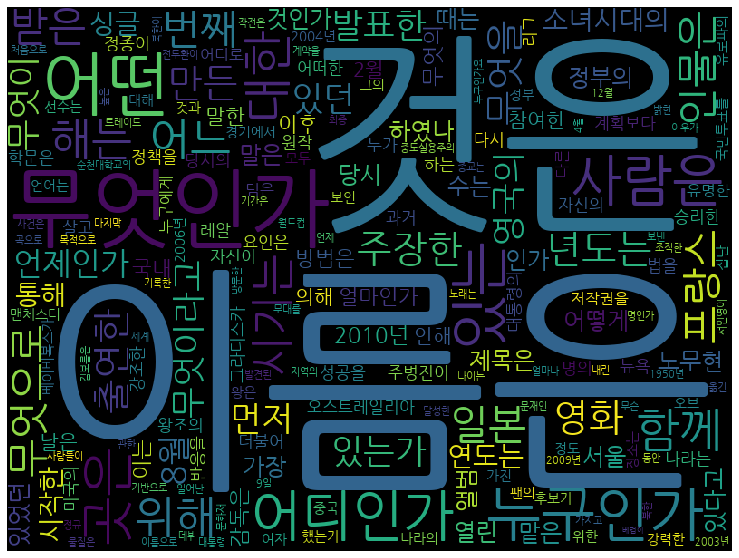

In [28]:
cloud = WordCloud(font_path = 'NanumGothic.ttf', width=800, height=600).generate(' '.join(q_sample_words))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

### 명사 토큰 기준

(-0.5, 799.5, 599.5, -0.5)

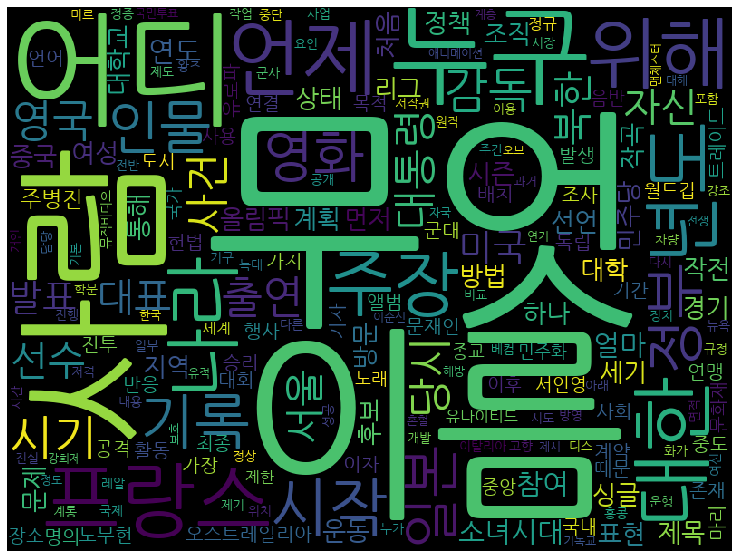

In [29]:
cloud = WordCloud(font_path = 'NanumGothic.ttf', width=800, height=600).generate(' '.join(phoneme_tokenizer.nouns(' '.join(q_sample_words))))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

## 지문 당 질문 수 분석

In [16]:
num_q_in_d = []
for d in train_data['data']:
    num_qas = [len(p['qas']) for p in d['paragraphs']]
    context = [p['context'] for p in d['paragraphs']]
    num_q_in_d += num_qas
        
print('텍스트 당 최대 질문 수: {}'.format(np.max(num_q_in_d)))
print('텍스트 당 최소 질문 수: {}'.format(np.min(num_q_in_d)))
print('텍스트 당 평균 질문 수: {:.2f}'.format(np.mean(num_q_in_d)))
print('텍스트 당 질문 수의 표준편차: {:.2f}'.format(np.std(num_q_in_d)))
print('텍스트 당 중간 질문 수: {}'.format(np.median(num_q_in_d)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위: {}'.format(np.percentile(num_q_in_d, 25)))
print('제 3 사분위: {}'.format(np.percentile(num_q_in_d, 75)))

텍스트 당 최대 질문 수: 9
텍스트 당 최소 질문 수: 0
텍스트 당 평균 질문 수: 6.24
텍스트 당 질문 수의 표준편차: 1.81
텍스트 당 중간 질문 수: 7.0
제 1 사분위: 5.0
제 3 사분위: 8.0


{'whiskers': [<matplotlib.lines.Line2D at 0x16623ee10>,
 'caps': [<matplotlib.lines.Line2D at 0x166246910>,
 'boxes': [<matplotlib.lines.Line2D at 0x16623e190>],
 'medians': [<matplotlib.lines.Line2D at 0x16623ed10>],
 'fliers': [<matplotlib.lines.Line2D at 0x166256d90>],
 'means': [<matplotlib.lines.Line2D at 0x166256890>]}

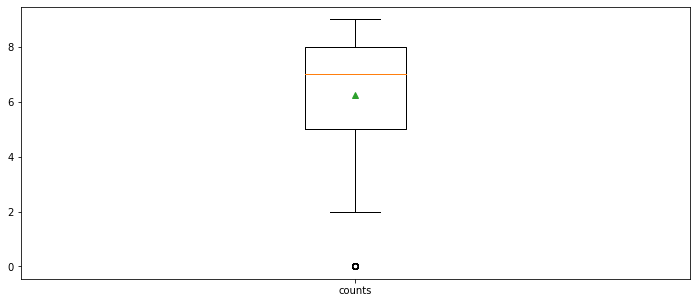

In [17]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([num_q_in_d],
             labels=['counts'],
             showmeans=True)

Text(0, 0.5, 'Probability')

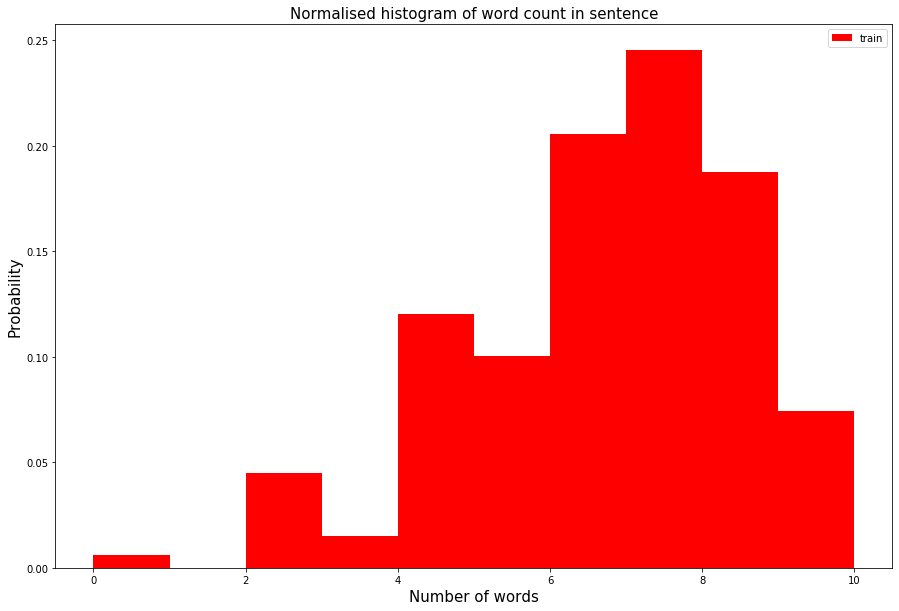

In [18]:
plt.figure(figsize=(15, 10))
plt.hist(num_q_in_d, bins=10, range=[0,10], facecolor='r', density=True, label='train')
plt.title("Normalised histogram of word count in sentence", fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)